In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import scipy.stats as stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix

In [2]:
#for better understanding I added the code from /Depression_Level_Classifier/feature_extraction.py instead of just calling it. 

def extractor(df, threshold=0.9):
    """
    ************************************************************************
    EXPLANATIONS
    
    Filter features based on correlation threshold and visualize the correlation matrices.
    
    In practice a threshold of 0.9 is widespread but there exists more conservatve
    thresholds like 0.8 which is a more conservative approach. You may choose it
    depending on the context.
    
    ************************************************************************
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing the features.
    threshold (float): The correlation threshold to filter features. Default is 0.9.
    
    Returns:
    selected_features (list): List of features with correlation below the threshold.
    excluded_features (list): List of features with correlation above the threshold.
    """
    
    # Calculate the correlation matrix
    corr_matrix = df.corr()
    
    # Create lists for selected features ("normal correlations") and excluded features (perfectly/almost perfectly correlated)
    selected_features = []
    excluded_features = []

    # Run through the upper triangular matrix of the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                excluded_features.append(colname)

    # fill lists of excluded and selected features
    excluded_features = list(set(excluded_features))
    selected_features = [feature for feature in corr_matrix.columns if feature not in excluded_features]

    # create correlation matrix of selected features
    selected_corr_matrix = corr_matrix.loc[selected_features, selected_features]

    # plot correlation matrix of selected features
    plt.figure(figsize=(12, 10))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Selected Features')
    plt.show()

    # create correlation matrix of excluded features and plot it
    if excluded_features:
        remaining_corr_matrix = corr_matrix.loc[excluded_features, excluded_features]        
        plt.figure(figsize=(20, 16))
        sns.heatmap(remaining_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix of Excluded Features')
        plt.show()
    else:
        print("No excluded features found.")

    # print lists of selected/excluded features
    print("Selected Features:", selected_features)
    print("Excluded Features:", excluded_features)


    # return lists of selected and excluded features
    return selected_features, excluded_features

(55730, 65)


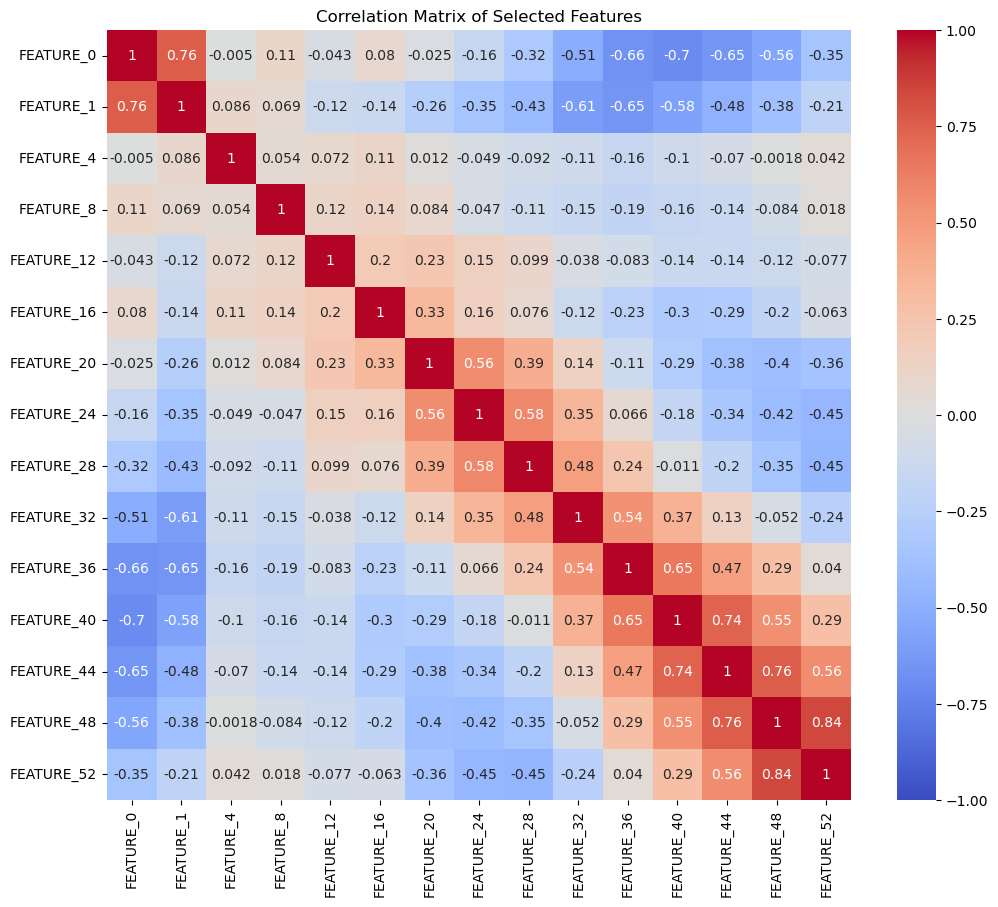

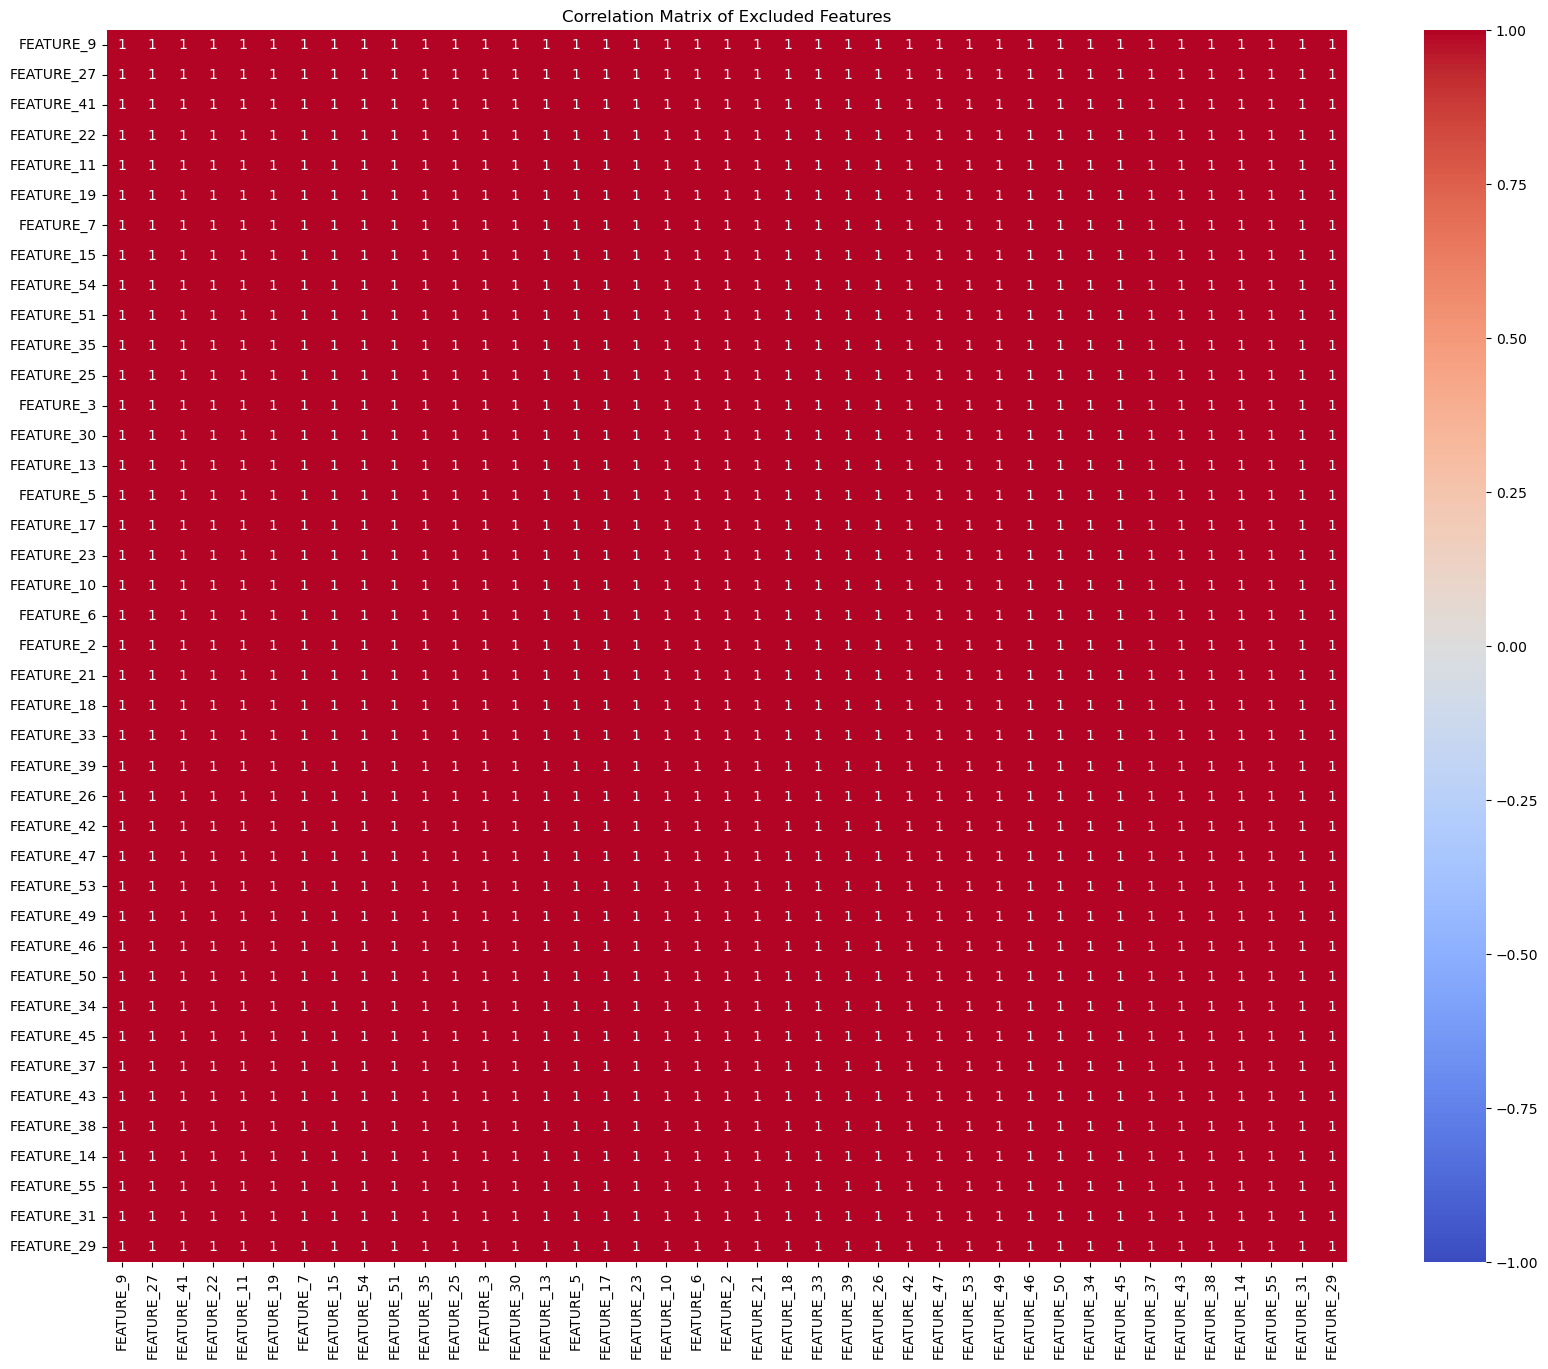

Selected Features: ['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']
Excluded Features: ['FEATURE_9', 'FEATURE_27', 'FEATURE_41', 'FEATURE_22', 'FEATURE_11', 'FEATURE_19', 'FEATURE_7', 'FEATURE_15', 'FEATURE_54', 'FEATURE_51', 'FEATURE_35', 'FEATURE_25', 'FEATURE_3', 'FEATURE_30', 'FEATURE_13', 'FEATURE_5', 'FEATURE_17', 'FEATURE_23', 'FEATURE_10', 'FEATURE_6', 'FEATURE_2', 'FEATURE_21', 'FEATURE_18', 'FEATURE_33', 'FEATURE_39', 'FEATURE_26', 'FEATURE_42', 'FEATURE_47', 'FEATURE_53', 'FEATURE_49', 'FEATURE_46', 'FEATURE_50', 'FEATURE_34', 'FEATURE_45', 'FEATURE_37', 'FEATURE_43', 'FEATURE_38', 'FEATURE_14', 'FEATURE_55', 'FEATURE_31', 'FEATURE_29']


(['FEATURE_0',
  'FEATURE_1',
  'FEATURE_4',
  'FEATURE_8',
  'FEATURE_12',
  'FEATURE_16',
  'FEATURE_20',
  'FEATURE_24',
  'FEATURE_28',
  'FEATURE_32',
  'FEATURE_36',
  'FEATURE_40',
  'FEATURE_44',
  'FEATURE_48',
  'FEATURE_52'],
 ['FEATURE_9',
  'FEATURE_27',
  'FEATURE_41',
  'FEATURE_22',
  'FEATURE_11',
  'FEATURE_19',
  'FEATURE_7',
  'FEATURE_15',
  'FEATURE_54',
  'FEATURE_51',
  'FEATURE_35',
  'FEATURE_25',
  'FEATURE_3',
  'FEATURE_30',
  'FEATURE_13',
  'FEATURE_5',
  'FEATURE_17',
  'FEATURE_23',
  'FEATURE_10',
  'FEATURE_6',
  'FEATURE_2',
  'FEATURE_21',
  'FEATURE_18',
  'FEATURE_33',
  'FEATURE_39',
  'FEATURE_26',
  'FEATURE_42',
  'FEATURE_47',
  'FEATURE_53',
  'FEATURE_49',
  'FEATURE_46',
  'FEATURE_50',
  'FEATURE_34',
  'FEATURE_45',
  'FEATURE_37',
  'FEATURE_43',
  'FEATURE_38',
  'FEATURE_14',
  'FEATURE_55',
  'FEATURE_31',
  'FEATURE_29'])

In [3]:
# Load the different datasets always activate only one and change title results accordingly

#data = pd.read_csv('/home/jovyan/Depression_Level_Classifier/data/Threshold_6_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100.csv')
#data = pd.read_csv('/home/jovyan/Depression_Level_Classifier/data/Threshold_6_Operator_-_Depressionfeature_BP_PHQ_9_PercentofDataset_100_v2.csv')
data = pd.read_csv('/home/jovyan/Depression_Level_Classifier/data/Threshold_14_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100.csv')
#data = pd.read_csv('/home/jovyan/Depression_Level_Classifier/data/Threshold_14_Operator_-_Depressionfeature_MH_PHQ_S_PercentofDataset_100_v2.csv')

#keep track which threshold and version to save results correctly. 
title_results = "TH14_V1"

print(data.shape)
columns_with_features = [col for col in data.columns if "FEATURE" in col]

extractor(data[columns_with_features])

These chosen features are the same for all four of my datasets, so I will only visualize them once. From now on, I will only use the selected features for my data.


In [4]:
# Define Data and Target for the training process

X = data[['FEATURE_0', 'FEATURE_1', 'FEATURE_4', 'FEATURE_8', 'FEATURE_12', 'FEATURE_16', 'FEATURE_20', 'FEATURE_24', 'FEATURE_28', 'FEATURE_32', 'FEATURE_36', 'FEATURE_40', 'FEATURE_44', 'FEATURE_48', 'FEATURE_52']]
y = data['Depression']
print(X.head)
print(X.shape)

<bound method NDFrame.head of        FEATURE_0  FEATURE_1  FEATURE_4  FEATURE_8  FEATURE_12  FEATURE_16  \
0       4.792575  -0.454412  -0.433326  -0.285131    0.086856    0.789794   
1       5.279217  -0.431700  -0.430996  -0.280940    0.203306    0.526883   
2       4.561739  -0.416991  -0.412708  -0.307388    0.153411    0.058543   
3       5.673028  -0.373179  -0.367160  -0.287103   -0.302983    0.326459   
4       6.275937  -0.361574  -0.350114  -0.235187   -0.177715    2.029707   
...          ...        ...        ...        ...         ...         ...   
55725   5.802579  -0.376974  -0.356568  -0.303957    0.310600    1.437855   
55726   4.588921  -0.456390  -0.442728  -0.227390    0.614065    1.466453   
55727   5.802579  -0.376974  -0.356568  -0.303957    0.310600    1.437855   
55728   2.124648  -0.410975  -0.333627  -0.263766    0.907659    2.415720   
55729   4.550862  -0.425936  -0.422995  -0.293757   -0.360727    0.237854   

       FEATURE_20  FEATURE_24  FEATURE_28  FE

In [5]:
# Split the data and standardize the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1896)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Define the grid for grid search
param_grid = {
    'C': [0.1, 1.0, 2.0, 5.0, 10.0], 
    'l1_ratio': [0.2, 0.5, 0.8], 
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'class_weight': ['balanced'],
    'max_iter': [10000],
    'random_state': [1896]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=1896)

# GridSearchCV for the Elastic Net
grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, scoring='roc_auc', cv=cv, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# include the best parameters from the gridsearch
best_params_grid = grid_search.best_params_
print(f'Best parameters from grid search: {best_params_grid}')

# final model with the best parameters
logistic_en = LogisticRegression(**best_params_grid)
logistic_en.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best parameters from grid search: {'C': 10.0, 'class_weight': 'balanced', 'l1_ratio': 0.8, 'max_iter': 10000, 'penalty': 'elasticnet', 'random_state': 1896, 'solver': 'saga'}


LogisticRegression(C=10.0, class_weight='balanced', l1_ratio=0.8,
                   max_iter=10000, penalty='elasticnet', random_state=1896,
                   solver='saga')

Threshold = 0.5
Accuracy: 0.6518, Precision: 0.2824, Recall: 0.5658, F1-score: 0.3767, ROC AUC: 0.6594
Confusion Matrix:
[[6092 2981]
 [ 900 1173]]



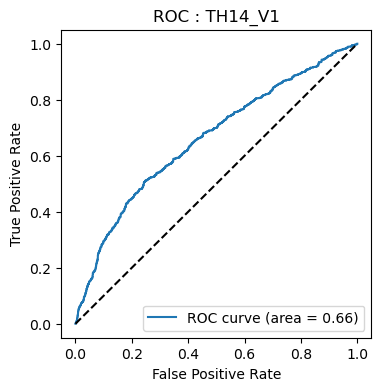

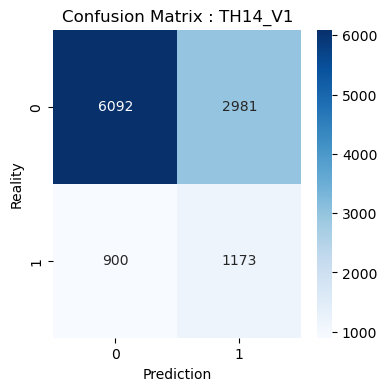

Threshold = 0.55
Accuracy: 0.7264, Precision: 0.3321, Recall: 0.4655, F1-score: 0.3876, ROC AUC: 0.6594
Confusion Matrix:
[[7132 1941]
 [1108  965]]



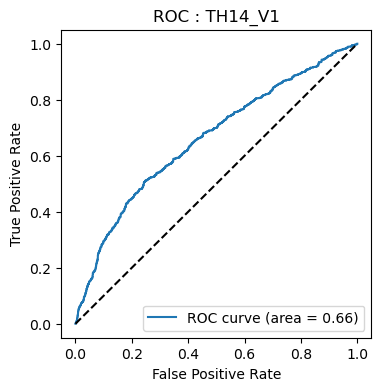

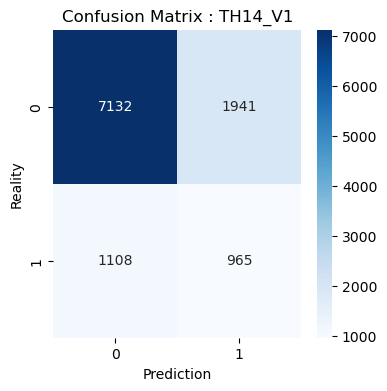

Threshold = 0.6
Accuracy: 0.7676, Precision: 0.3668, Recall: 0.3435, F1-score: 0.3548, ROC AUC: 0.6594
Confusion Matrix:
[[7844 1229]
 [1361  712]]



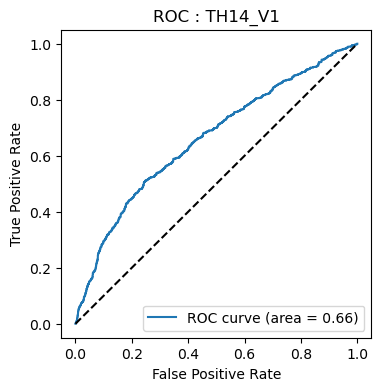

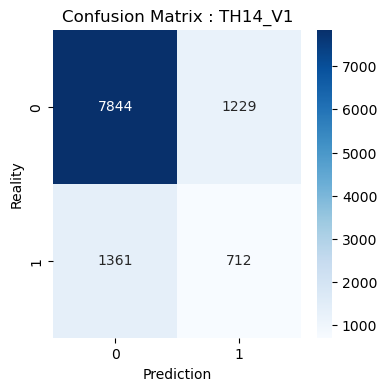

Threshold = 0.65
Accuracy: 0.7933, Precision: 0.4103, Recall: 0.2547, F1-score: 0.3143, ROC AUC: 0.6594
Confusion Matrix:
[[8314  759]
 [1545  528]]



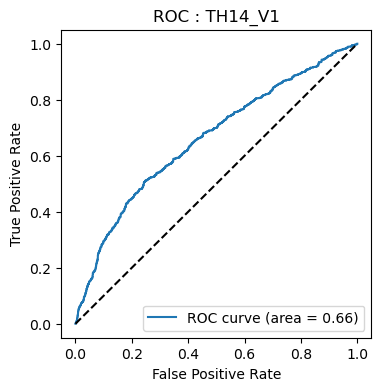

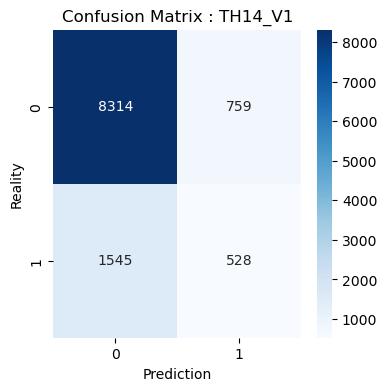

In [8]:
# Comparing different tresholds
thresholds = [0.5, 0.55, 0.6 , 0.65]

# Evaluate the model for each threshold
for threshold in thresholds:
    # Predict probabilities and convert to binary predictions
    y_pred_prob = logistic_en.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Print results for each threshold
    print(f"Threshold = {threshold}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()

    # ROC
    plt.figure(figsize=(4, 4))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC : {title_results}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    #plt.savefig(f'ROC/ROC_Elastic_Net_Classifier_{title_results}.png')
    plt.show()
    
    # confusion matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix : {title_results}')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    #plt.savefig(f'Confusion_Matrix/Conf_Elastic_Net_Classifier_{title_results}.png') 
    plt.show()
